In [ ]:
# File names import
from os import listdir
from os.path import isfile, join

In [ ]:
# Healthy Controls (Eyes Open)
H_EO_path = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/H/EO"
file_names_H_EO = [f for f in listdir(H_EO_path) if isfile(join(H_EO_path, f))]

# Healthy Controls (Eyes Closed)
H_EC_path = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/H/EC"
file_names_H_EC = [f for f in listdir(H_EC_path) if isfile(join(H_EC_path, f))]

# Healthy Controls (Task)
H_TASK_path = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/H/TASK"
file_names_H_TASK = [f for f in listdir(H_TASK_path) if isfile(join(H_TASK_path, f))]

# MDD (Eyes Open)
MDD_EO_path = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/MDD/EO"
file_names_MDD_EO = [f for f in listdir(MDD_EO_path) if isfile(join(MDD_EO_path, f))]

# MDD (Eyes Closed)
MDD_EC_path = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/MDD/EC"
file_names_MDD_EC = [f for f in listdir(MDD_EC_path) if isfile(join(MDD_EC_path, f))]

# MDD (Task)
MDD_TASK_path = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/MDD/TASK"
file_names_MDD_TASK = [f for f in listdir(MDD_TASK_path) if isfile(join(MDD_TASK_path, f))]

# Create file names list
file_names = [file_names_H_EO, file_names_H_EC, file_names_H_TASK, file_names_MDD_EO, file_names_MDD_EC, file_names_MDD_TASK]

In [ ]:
# Load Data
import numpy as np
import mne

H_EO_data = []
H_EC_data = []
H_TASK_data = []
MDD_EO_data = []
MDD_EC_data = []
MDD_TASK_data = []

for i in range(len(file_names)):
    for j in range(len(file_names[i])):
        if i == 0:
            file =  "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/H/EO/" + file_names[i][j]
            data = mne.io.read_raw_edf(file)
            H_EO_data.append(data.get_data())
        if i == 1:
            file = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/H/EC/" + file_names[i][j]
            data = mne.io.read_raw_edf(file)
            H_EC_data.append(data.get_data())
        if i == 2:
            file = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/H/TASK/" + file_names[i][j]
            data = mne.io.read_raw_edf(file)
            H_TASK_data.append(data.get_data())
        if i == 3:
            file = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/MDD/EO/" + file_names[i][j]
            data = mne.io.read_raw_edf(file)
            MDD_EO_data.append(data.get_data())
        if i == 4:
            file = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/MDD/EC/" + file_names[i][j]
            data = mne.io.read_raw_edf(file)
            MDD_EC_data.append(data.get_data())
        if i == 5:
            file = "C:/Users/xmoot/Desktop/Jupyter/Mathematical Biology/Final Project/HUMS Dataset/MDD/TASK/" + file_names[i][j]
            data = mne.io.read_raw_edf(file)
            MDD_TASK_data.append(data.get_data())
            if j == len(file_names[5]) - 1:
                print("Finished")

In [ ]:
# Create a filter function to filter EEG signals (due to electrical noise of the power grid)
# Takes a long time to run (~1hr)
def filter(data):
    # Input: numpy ndarray
    
    # Apply a high-pass filter at 0.5 Hz
    mne.filter.filter_data(data, sfreq = 256, l_freq=0.5, h_freq=None)

    # Apply a low-pass filter at 70 Hz
    mne.filter.filter_data(data, sfreq = 256, l_freq=None, h_freq=70)

    # Apply a notch filter at 50 Hz
    mne.filter.notch_filter(data, Fs = 256, freqs=50)

# We keep only the first 19 channels, as the other 3 are redundant
# Then for each sample, we apply our filter 
for i in range(len(H_EO_data)):
    H_EO_data[i] = H_EO_data[i][0:19]
    filter(H_EO_data[i])
for i in range(len(H_EC_data)):
    H_EC_data[i] = H_EC_data[i][0:19]
    filter(H_EC_data[i])
for i in range(len(H_TASK_data)):
    H_TASK_data[i] = H_TASK_data[i][0:19]
    filter(H_TASK_data[i])
for i in range(len(MDD_EO_data)):
    MDD_EO_data[i] = MDD_EO_data[i][0:19]
    filter(MDD_EO_data[i])
for i in range(len(MDD_EC_data)):
    MDD_EC_data[i] = MDD_EC_data[i][0:19]
    filter(MDD_EC_data[i])
for i in range(len(MDD_TASK_data)):
    MDD_TASK_data[i] = MDD_TASK_data[i][0:19]
    filter(MDD_TASK_data[i])
    if i == len(MDD_TASK_data) - 1:
        print("Finished")

In [ ]:
# Remove Artifacts (add later)

In [ ]:
# Phase Lock Value
import scipy
def plv(e_i, e_j):
    # e_i: Electrode i, a numpy array of shape (n,)
    # e_j: Electrode j, a numpy array of shape (n,)
    n = np.shape(e_i)[0]
    
    # Compute the phases
    fft_i = scipy.fftpack.fft(e_i)
    fft_j = scipy.fftpack.fft(e_j)
    phase_i = np.angle(fft_i)
    phase_j = np.angle(fft_j)
    
    # Phase differences
    phase_diff = phase_i - phase_j
    
    # Sum terms
    sum_terms = [np.exp(- (1j * (phase_diff[t]))) for t in range(n)]
    phase_lock_value = (1/n) * np.abs(np.sum(sum_terms))
    
    return phase_lock_value

In [ ]:
# Phase Lag Index
def pli(e_i, e_j):
    # e_i: Electrode i, a numpy array of shape n x 1
    # e_j: Electrode j, a numpy array of shape n x 1
    n = np.shape(e_i)[0]
    
    # Compute the phases
    fft_i = scipy.fftpack.fft(e_i)
    fft_j = scipy.fftpack.fft(e_j)
    phase_i = np.angle(fft_i)
    phase_j = np.angle(fft_j)
    
    # Phase differences
    phase_diff = phase_i - phase_j
    
    # Phase lag index
    sum_terms = [np.sign(np.imag(np.exp(1j * (phase_diff[t])))) for t in range(n)]
    phase_lag_index = np.abs((1.000000/n) * sum(sum_terms))
    
    return phase_lag_index

In [ ]:
def cor(e_i, e_j):
    # e_i: Electrode i, a numpy array of shape n x 1
    # e_j: Electrode j, a numpy array of shape n x 1
    x = np.array([e_i, e_j])
    return np.corrcoef(x)[0,1]

In [ ]:
# Creates a sequence of weighted functional connectivity matrices
def adj_matrix(A, start, stop, t_slice, method):
    #A: Numpy array of shape 19 x (time points), representing the EEG data of a single patient
    #start: The starting index time point
    #stop: The stopping index time point
    #t_slice: The time segment where we compute
    #method: A string of either ['pli', 'plv', 'cor'], for Phase Lag Index, Phase Lock Value, or Correlation
    
    # Number of time slices we will compute
    n = (stop - start) // t_slice
    end = n * t_slice
    
    # Array storing the sequence of functional connectivity matrices
    seq = np.zeros((n, 19, 19))
    
    # Phase Lag Index
    if method == 'pli':
        for k in range(0, end - t_slice + 1, t_slice):
            A_temp = A[:19, k : k + t_slice]
            matrix = np.zeros((19,19))
            for i in range(19):
                for j in range(19):
                    matrix[i][j] = pli(A_temp[i], A_temp[j])
            seq[k // t_slice] = matrix
            
    # Phase Lock Value       
    if method == 'plv':
        for k in range(0, end - t_slice + 1, t_slice):
            A_temp = A[:19, k : k + t_slice]
            matrix = np.zeros((19,19))
            for i in range(19):
                for j in range(19):
                    matrix[i][j] = plv(A_temp[i], A_temp[j])
            seq[k // t_slice] = matrix
        
    # Correlation
    if method == 'cor':
        for k in range(0, end - t_slice + 1, t_slice):
            A_temp = A[:19, k : k + t_slice]
            matrix = np.zeros((19,19))
            for i in range(19):
                for j in range(19):
                    matrix[i][j] = cor(A_temp[i], A_temp[j])
            seq[k // t_slice] = matrix
    
    return seq

In [ ]:
# We will train and test only the TASK data (ignoring EC and EO data for now)
# Each EEG signal is varying in time length. We first find the EEG signal with least time
M_1 = min([np.shape(H_TASK_data[i])[1] for i in range(len(H_TASK_data))])
M_2 = min([np.shape(MDD_TASK_data[i])[1] for i in range(len(MDD_TASK_data))])

# Round down to nearest order of 10000
M = min(M_1, M_2) - 3856

In [ ]:
# Hyperparameters
# (Takes a long time to run ~1-2hrs)
start = 0
stop = M
t_slice = 10000
method = 'plv'

# Make seq of graphs for each patient
MDD_TASK_graphs = []
H_TASK_graphs = []

for x in MDD_TASK_data:
    patient_seq = adj_matrix(x, start, stop, t_slice, method)
    patient_id = 1
    MDD_TASK_graphs.append([patient_seq, patient_id])

for x in H_TASK_data:
    patient_seq = adj_matrix(x, start, stop, t_slice, method)
    patient_id = 0
    H_TASK_graphs.append([patient_seq, patient_id])

In [ ]:
# Combine lists to get our dataset
# This is a dataset of size n = 61, one example for each patient
# 15 graphs per patient over different time points
TASK_graphs = MDD_TASK_graphs + H_TASK_graphs

# Shuffle data
import random
random.shuffle(TASK_graphs)

In [ ]:
# Merge the 15 graphs per patient into one dataset
# Now our dataset is of size n = 915, which are all graphs mixed together, 
# with their corresponding patient_id label (1 or 0, representing MDD or healthy)
TASK_graphs_mixed = []

for i in range(len(TASK_graphs)):
    patient_id = TASK_graphs[i][1]
    for j in range(15):
        graph = TASK_graphs[i][0][j]
        TASK_graphs_mixed.append([graph, patient_id])

# Shuffle data
random.shuffle(TASK_graphs_mixed)

In [ ]:
# Torch
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Separate things into an X and Y arrays, representing inputs and labels
n = len(TASK_graphs_mixed)
X = np.zeros((n, 19, 19))
Y = np.zeros((n, 1))

for i in range(n):
    X[i] = TASK_graphs_mixed[i][0]
    Y[i] = TASK_graphs_mixed[i][1]

# Translate the above to torch tensors
X_tensor = torch.Tensor(X)
Y_tensor = torch.Tensor(Y)

In [ ]:
# CNNs ONLY
# Reshape each input in X as shape (1,19,19) not (19,19)
# We do this because this is how convolutional layers want their dimensions
n = len(TASK_graphs_mixed)
X = np.zeros((n, 1, 19, 19))
Y = np.zeros((n, 1))

for i in range(n):
    X[i] = np.reshape(TASK_graphs_mixed[i][0], (1,19,19))
    Y[i] = TASK_graphs_mixed[i][1]

# Translate the above to torch tensors
X_tensor = torch.Tensor(X)
Y_tensor = torch.Tensor(Y)

In [ ]:
# Load training set, test set, and their dataloaders
trainset = TensorDataset(X_tensor[0:715], Y_tensor[0:715])
testset = TensorDataset(X_tensor[715:915], Y_tensor[715:915] )
trainloader = DataLoader(trainset)
testloader = DataLoader(testset)
classes = (0,1)

In [ ]:
# define network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(16 * 3 * 3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)

    def forward(self, x):
        # Convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten
        x = x.view(-1, 16 * 3 * 3)
        # Classification layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

In [ ]:
# Function to save each model
# Later we load model epoch by epoch to plot training/test data curves
def save_model(model, epoch):
    path = f"model_epoch_{epoch}.pt"
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict()
    }, path)

In [ ]:
# Neural Network
net = Net()

# Loss function (binary cross entropy)
criterion = nn.BCELoss()

# # Optimizer (SGD with momentum)
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Optimizer: Adams
optimizer = optim.Adam(params = net.parameters(), lr = 0.0001)

# train the model
nepochs = 80
for epoch in range(nepochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    save_model(net, epoch)
print('Finished Training')

# save trained model
# PATH = 'model_1.pth'
# torch.save(net.state_dict(), PATH)

In [ ]:
# Training Accuracy
# Accuracy on the full training set (715 graphs) for each epoch

train_accuracy = []

for epoch in range(nepochs):
    # Load model
    net = Net()
    path = f"model_epoch_{epoch}.pt"
    net_dict = torch.load(path)
    net.load_state_dict(net_dict['model_state_dict'])
    
    # Compute top-1 average accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            inputs, labels = data
            outputs = net(inputs).data

            # Apply probability threshold of 0.5 from sigmoid output
            if outputs > 0.5:
                prediction = 1
            else:
                prediction = 0
            total += 1
            if prediction == labels:
                correct += 1
        train_accuracy.append((100 * correct / total))

In [ ]:
# Test Accuracy
# Accuracy on the full test set (200 graphs) for each epoch

test_accuracy = []

for epoch in range(nepochs):
    # Load model
    net = Net()
    path = f"model_epoch_{epoch}.pt"
    net_dict = torch.load(path)
    net.load_state_dict(net_dict['model_state_dict'])
    
    # Compute top-1 average accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net(inputs).data

            # Apply probability threshold of 0.5 from sigmoid output
            if outputs > 0.5:
                prediction = 1
            else:
                prediction = 0
            total += 1
            if prediction == labels:
                correct += 1
        test_accuracy.append((100 * correct / total))

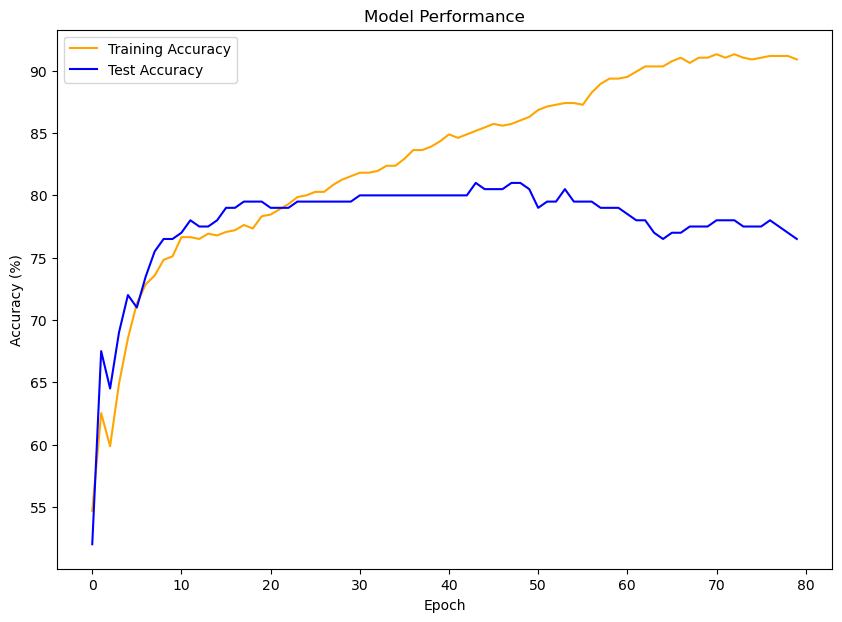

In [29]:
# Plott test accuracy vs train accuracy over nepochs
import matplotlib.pyplot as plt

x = np.arange(0, nepochs)
plt.figure(figsize=(10,7))
plt.plot(x, train_accuracy, 'orange', label = "Training Accuracy")
plt.plot(x, test_accuracy, 'b', label = "Test Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance')
plt.legend()
plt.savefig('model_performance.png')
plt.show()

In [ ]:
# Test accuracy
# load trained network
net = Net()
net.load_state_dict(torch.load(PATH))

# Accuracy on the full test set (200 graphs)
correct = 0
total = 0
for data in testloader:
    inputs, labels = data
    outputs = net(inputs).data
    
    # Compute the prediction from the sigmoid probability
    # We set the probability threshold of 0.5
    # This threshold works because we have nearly the same number of MDD patients (n = 33) as Healthy patients (n = 28)
    if outputs > 0.5:
        prediction = 1
    else:
        prediction = 0
    total += 1
    if prediction == labels:
        correct += 1
print('Test accuracy of the network on the 200 graphs: %d %%' % (
    100 * correct / total))